In [4]:
%pip install diffusers transformers accelerate scipy safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 15.1 MB/s eta 0:00:00


In [3]:
import torch
torch.__version__

'2.1.0+cu121'

In [2]:
import torch
from PIL import Image
import torch
import numpy as np
from diffusers import StableDiffusionInpaintPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
pipe_stability = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)
pipe_stability = pipe_stability.to("cuda")

model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
pipe_runway = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
pipe_runway = pipe_runway.to("cuda")

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


#Generating the background

In [ ]:
input_image = Image.open('example1.jpg')

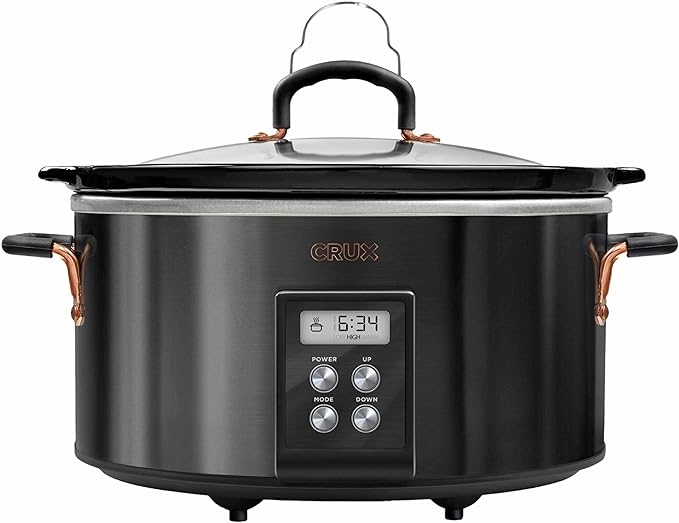

In [95]:
input_image

In [96]:
SIZE = 512
RESIZE_FACTOR = 0.25
WIDTH, HEIGHT = input_image.size
LOC_X, LOC_Y = 100, 100

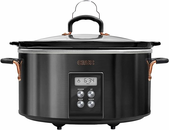

In [97]:
input_resized = input_image.resize((int(WIDTH * RESIZE_FACTOR), int(HEIGHT * RESIZE_FACTOR)), Image.LANCZOS)
WIDTH_NEW, HEIGHT_NEW = input_resized.size
input_resized_arr = np.asarray(input_resized)
input_resized

In [98]:
input_resized_arr.shape

(130, 169, 3)

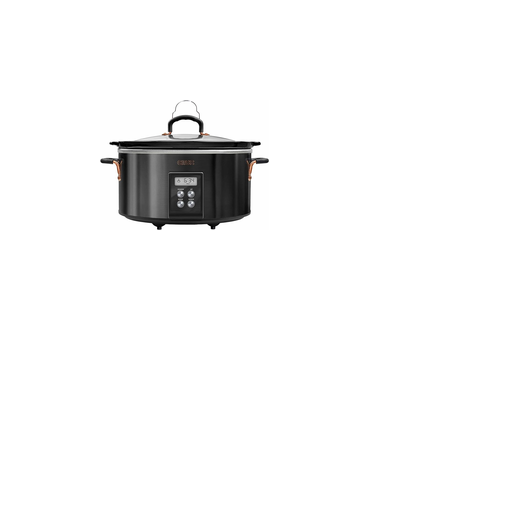

In [99]:
input_with_background = np.ones((SIZE, SIZE, 3)) * 255
input_with_background[LOC_Y:LOC_Y+HEIGHT_NEW, LOC_X:LOC_X+WIDTH_NEW, :] = input_resized_arr
input_with_background_image = Image.fromarray(np.uint8(input_with_background))
input_with_background_image

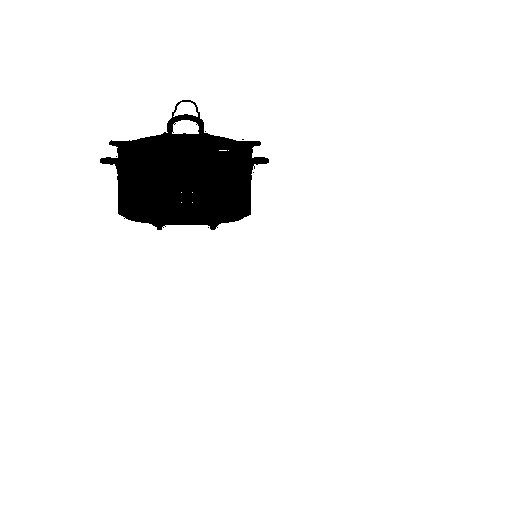

In [100]:
mask_array = np.where(input_with_background[:,:,2] < 250, 0, 255)
mask_array = np.tile(mask_array[:, :, np.newaxis], 3)
mask_image = Image.fromarray(np.uint8(mask_array))
mask_image

  0%|          | 0/50 [00:00<?, ?it/s]

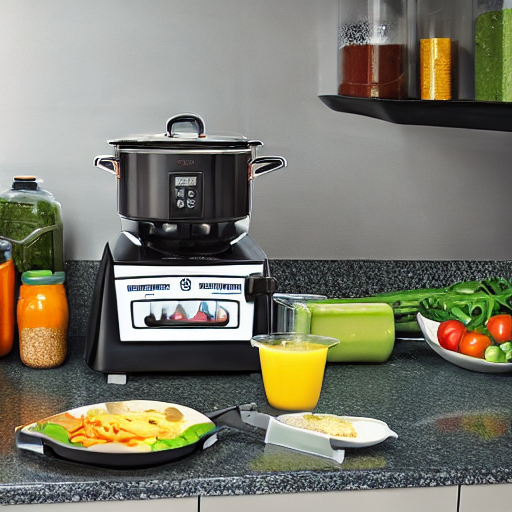

In [104]:
prompt = "Product in a kitchen used in meal preparation"
new_image = pipe_runway(prompt=prompt,
                        image=input_with_background_image,
                        mask_image=mask_image,
                        num_inference_steps=50).images[0]
new_image

  0%|          | 0/50 [00:00<?, ?it/s]

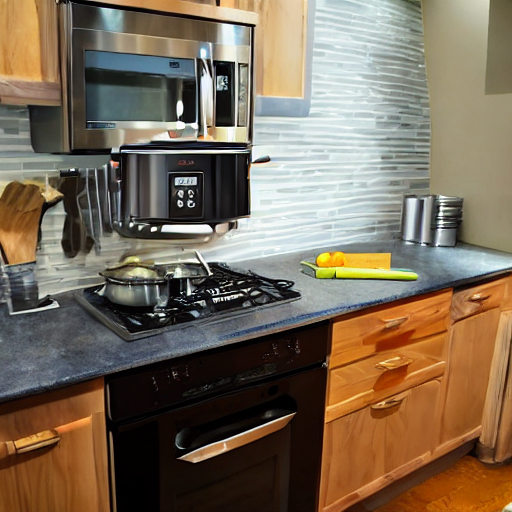

In [102]:
prompt = "Product in a kitchen used in meal preparation"
new_image_1 = pipe_runway_1(prompt=prompt,
                        image=input_with_background_image,
                        mask_image=mask_image,
                        num_inference_steps=50).images[0]
new_image_1

  0%|          | 0/50 [00:00<?, ?it/s]

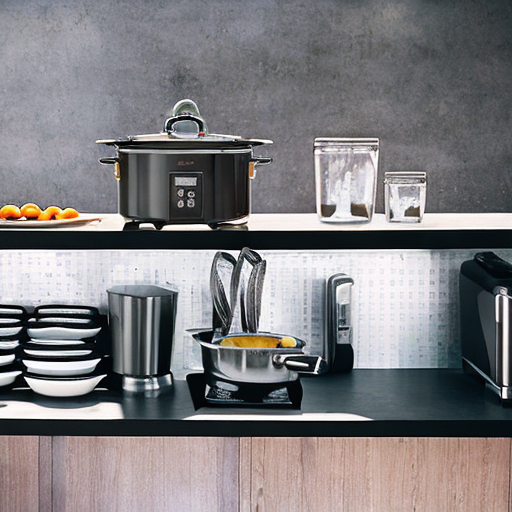

In [103]:
new_image_stability = pipe_stability(prompt=prompt, image=input_with_background_image, mask_image=mask_image).images[0]
new_image_stability

In [42]:
def shift_image(image, x, y, constant_value=255):
    shifted_image = np.roll(image, (y, x), axis=(0, 1))
    if x>=0:
        shifted_image[:, :x, :] = constant_value
    else:
        shifted_image[:, x:, :] = constant_value
    if y>=0:
        shifted_image[:y, :, :] = constant_value
    else:
        shifted_image[y:, :, :] = constant_value
    return Image.fromarray(np.uint8(shifted_image))

In [123]:
utensil_stability_50 = [new_image]
shifts = [(2,4)]*25 +[(4,2)]*25
image_in = new_image
for i in range(50):
    x, y = shifts[i]
    image_array = np.array(image_in)
    shifted_image = shift_image(image_array, x, y, constant_value=255)
    shifted_mask = shift_image(np.zeros_like(image_array), x, y, constant_value=255)
    image_out = pipe_stability(prompt=prompt, image=shifted_image, mask_image=shifted_mask).images[0]
    utensil_stability_50.append(image_out)
    image_in = image_out



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

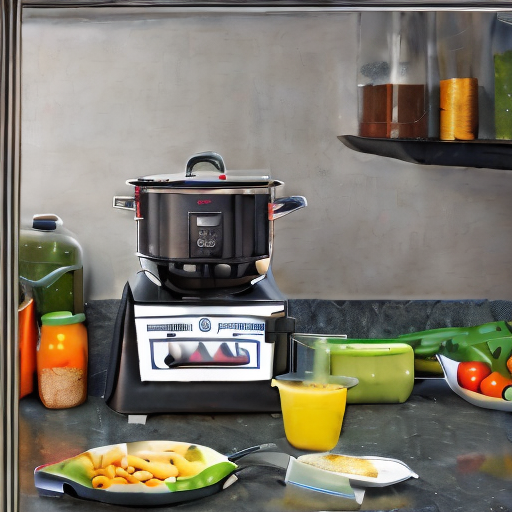

In [124]:
utensil_stability_50[10]

In [125]:
import imageio

def create_video(image_list, output_path, fps):
    # Convert PIL images to numpy arrays
    image_array = [np.array(img) for img in image_list]

    # Save the images as a video
    imageio.mimsave(output_path, image_array, fps=fps)

# Specify the output path for the video
output_path = "./utensil_stability_50.mp4"

# Specify the frames per second (fps)
fps = 25

# Create the video
create_video(utensil_stability_50, output_path, fps)


# Second example

In [66]:
input_image = Image.open('example4.jpg')

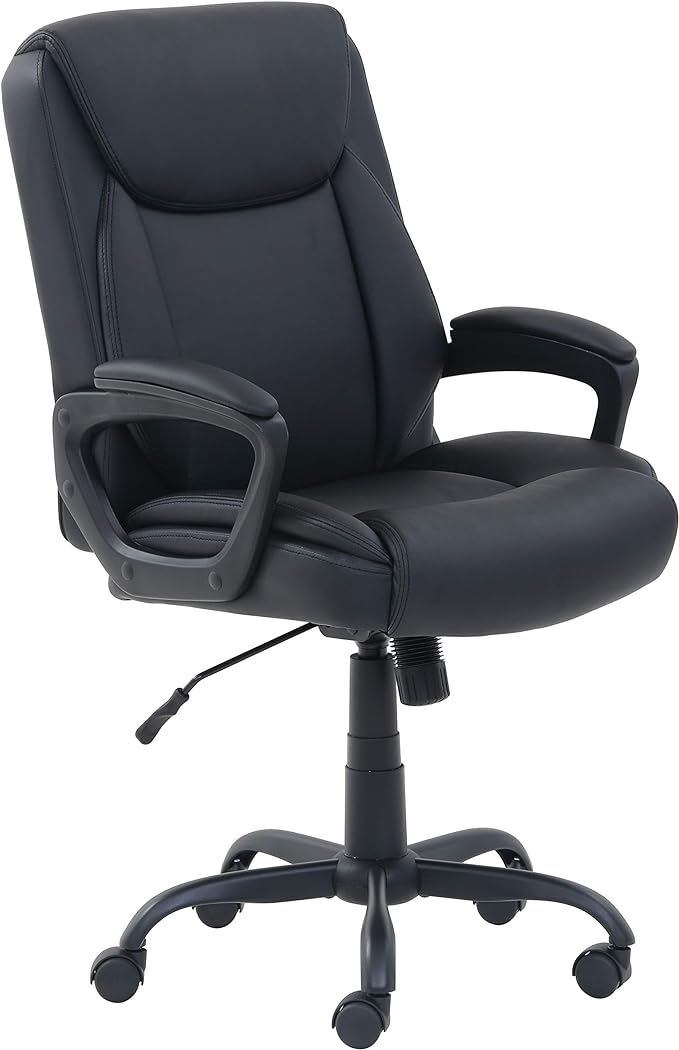

In [67]:
input_image

In [68]:
SIZE = 512
RESIZE_FACTOR = 0.25
WIDTH, HEIGHT = input_image.size
LOC_X, LOC_Y = 100, 100

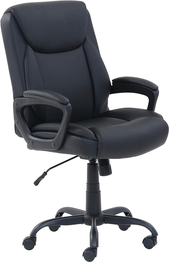

In [69]:
input_resized = input_image.resize((int(WIDTH * RESIZE_FACTOR), int(HEIGHT * RESIZE_FACTOR)), Image.LANCZOS)
WIDTH_NEW, HEIGHT_NEW = input_resized.size
input_resized_arr = np.asarray(input_resized)
input_resized

In [70]:
input_resized_arr.shape

(262, 169, 3)

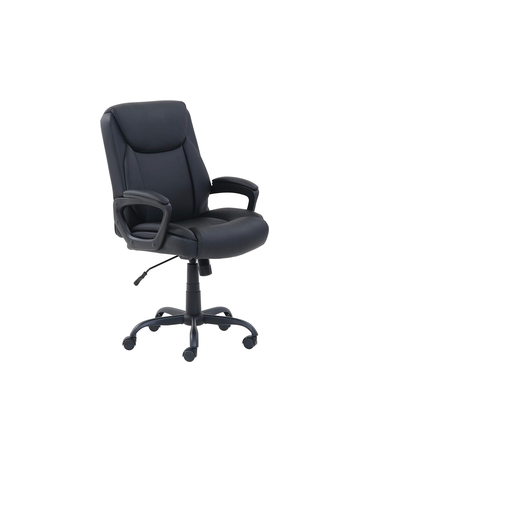

In [71]:
input_with_background = np.ones((SIZE, SIZE, 3)) * 255
input_with_background[LOC_Y:LOC_Y+HEIGHT_NEW, LOC_X:LOC_X+WIDTH_NEW, :] = input_resized_arr
input_with_background_image = Image.fromarray(np.uint8(input_with_background))
input_with_background_image

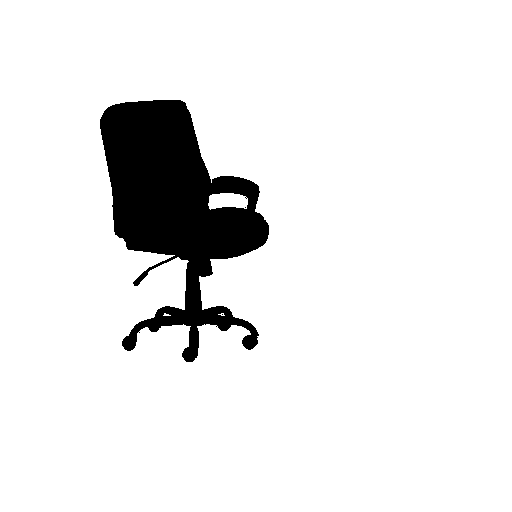

In [72]:
mask_array = np.where(input_with_background[:,:,2] < 250, 0, 255)
mask_array = np.tile(mask_array[:, :, np.newaxis], 3)
mask_image = Image.fromarray(np.uint8(mask_array))
mask_image

In [81]:
prompt = "chair in an office"

  0%|          | 0/50 [00:00<?, ?it/s]

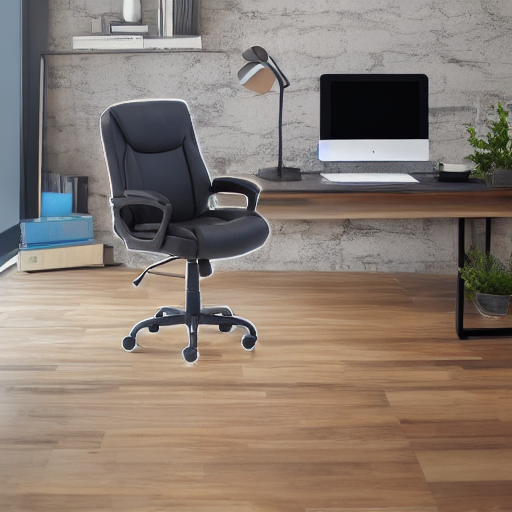

In [76]:

new_image = pipe_runway(prompt=prompt,
                        image=input_with_background_image,
                        mask_image=mask_image,
                        num_inference_steps=50).images[0]
new_image

  0%|          | 0/50 [00:00<?, ?it/s]

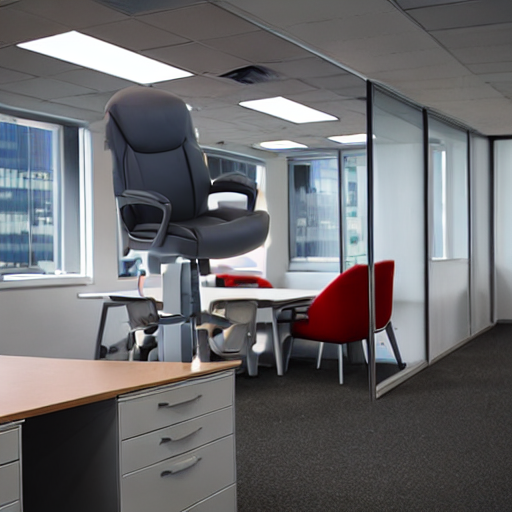

In [82]:

new_image_1 = pipe_runway_1(prompt=prompt,
                        image=input_with_background_image,
                        mask_image=mask_image,
                        num_inference_steps=50).images[0]
new_image_1

  0%|          | 0/50 [00:00<?, ?it/s]

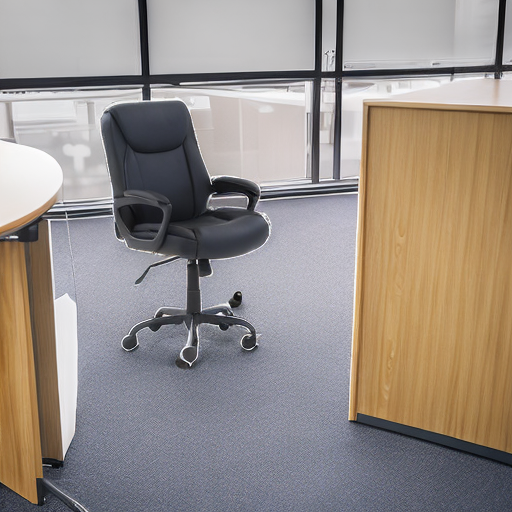

In [83]:
new_image_stability = pipe_stability(prompt=prompt, image=input_with_background_image, mask_image=mask_image).images[0]
new_image_stability

In [84]:
def shift_image(image, x, y, constant_value=255):
    shifted_image = np.roll(image, (y, x), axis=(0, 1))
    if x>=0:
        shifted_image[:, :x, :] = constant_value
    else:
        shifted_image[:, x:, :] = constant_value
    if y>=0:
        shifted_image[:y, :, :] = constant_value
    else:
        shifted_image[y:, :, :] = constant_value
    return Image.fromarray(np.uint8(shifted_image))

In [89]:
chair_stability_20 = [new_image]
shifts = [(5,10)]*10 +[(10,5)]*10
image_in = new_image
for i in range(20):
    x, y = shifts[i]
    image_array = np.array(image_in)
    shifted_image = shift_image(image_array, x, y, constant_value=255)
    shifted_mask = shift_image(np.zeros_like(image_array), x, y, constant_value=255)
    image_out = pipe_stability(prompt=prompt, image=shifted_image, mask_image=shifted_mask).images[0]
    chair_stability_20.append(image_out)
    image_in = image_out



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

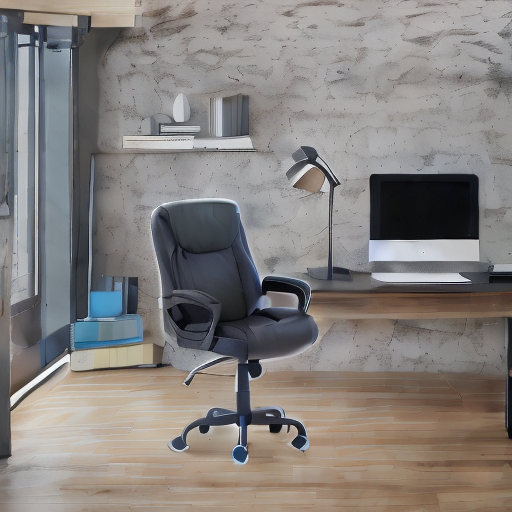

In [92]:
chair_stability_20[10]

In [91]:
import imageio

def create_video(image_list, output_path, fps):
    # Convert PIL images to numpy arrays
    image_array = [np.array(img) for img in image_list]

    # Save the images as a video
    imageio.mimsave(output_path, image_array, fps=fps)

# Specify the output path for the video
output_path = "./chair_stability_output_video_20.mp4"

# Specify the frames per second (fps)
fps = 10

# Create the video
create_video(chair_stability_20, output_path, fps)


# Example 1 with better video

In [5]:
input_image = Image.open('example1.jpg')

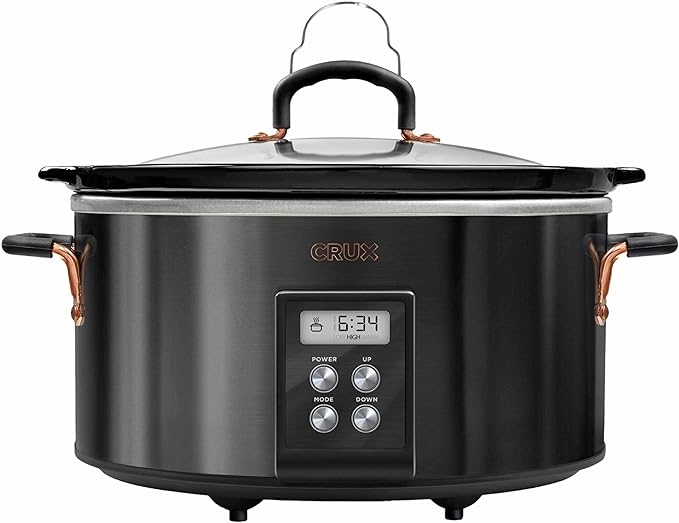

In [6]:
input_image

In [7]:
SIZE = 512
RESIZE_FACTOR = 0.25
WIDTH, HEIGHT = input_image.size
LOC_X, LOC_Y = 100, 100

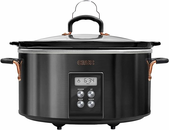

In [8]:
input_resized = input_image.resize((int(WIDTH * RESIZE_FACTOR), int(HEIGHT * RESIZE_FACTOR)), Image.LANCZOS)
WIDTH_NEW, HEIGHT_NEW = input_resized.size
input_resized_arr = np.asarray(input_resized)
input_resized

In [9]:
input_resized_arr.shape

(130, 169, 3)

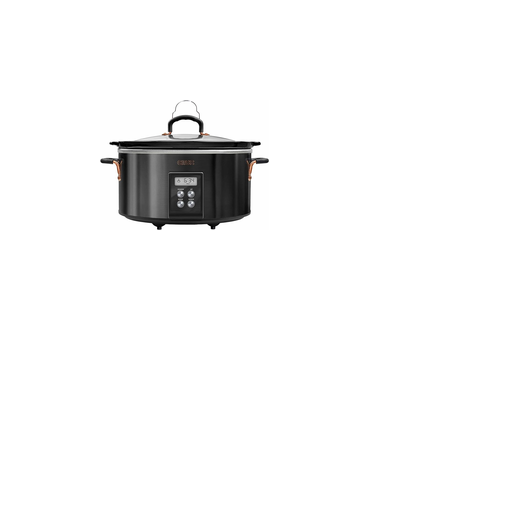

In [10]:
input_with_background = np.ones((SIZE, SIZE, 3)) * 255
input_with_background[LOC_Y:LOC_Y+HEIGHT_NEW, LOC_X:LOC_X+WIDTH_NEW, :] = input_resized_arr
input_with_background_image = Image.fromarray(np.uint8(input_with_background))
input_with_background_image

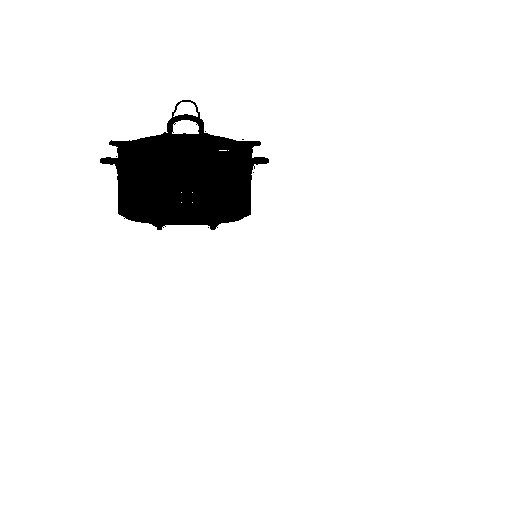

In [11]:
mask_array = np.where(input_with_background[:,:,2] < 250, 0, 255)
mask_array = np.tile(mask_array[:, :, np.newaxis], 3)
mask_image = Image.fromarray(np.uint8(mask_array))
mask_bool = np.where(mask_array == 0, 0, 1)
reverse_mask_bool = np.where(mask_array == 0, 1, 0)
mask_image

  0%|          | 0/50 [00:00<?, ?it/s]

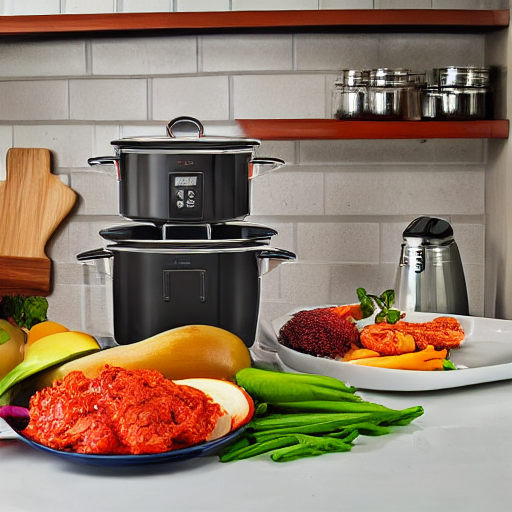

In [12]:
prompt = "product in a kitchen used in meal preparation"
new_image_runway = pipe_runway(prompt=prompt,
                        image=input_with_background_image,
                        mask_image=mask_image,
                        num_inference_steps=50).images[0]
new_image_runway

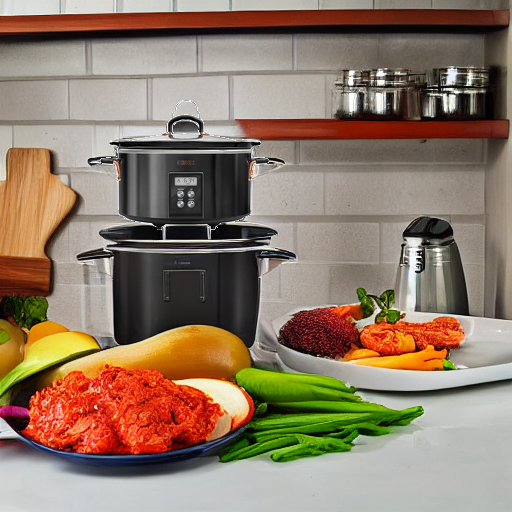

In [13]:
final_image_runway = new_image_runway*mask_bool + input_with_background_image*reverse_mask_bool
final_image_runway = Image.fromarray(np.uint8(final_image_runway))
final_image_runway

  0%|          | 0/50 [00:00<?, ?it/s]

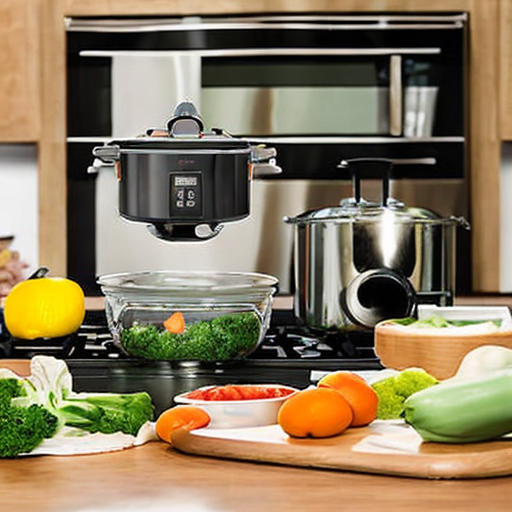

In [14]:
new_image_stability = pipe_stability(prompt=prompt, image=input_with_background_image, mask_image=mask_image).images[0]
new_image_stability

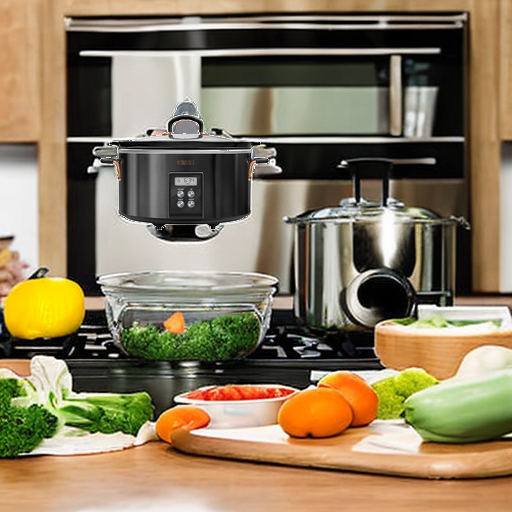

In [15]:
final_image_stability = new_image_stability*mask_bool + input_with_background_image*reverse_mask_bool
final_image_stability = Image.fromarray(np.uint8(final_image_stability))
final_image_stability

In [16]:
def shift_image(image, x, y, constant_value=255):
    shifted_image = np.roll(image, (y, x), axis=(0, 1))
    if x>=0:
        shifted_image[:, :x, :] = constant_value
    else:
        shifted_image[:, x:, :] = constant_value
    if y>=0:
        shifted_image[:y, :, :] = constant_value
    else:
        shifted_image[y:, :, :] = constant_value
    return Image.fromarray(np.uint8(shifted_image))

In [18]:
shifts = [(5,10)]*10 +[(10,5)]*10
image_in = final_image_runway
utensil_stability_20 = [image_in]
for i in range(20):
    x, y = shifts[i]
    image_array = np.array(image_in)
    shifted_image = shift_image(image_array, x, y, constant_value=255)
    shifted_mask = shift_image(np.zeros_like(image_array), x, y, constant_value=255)
    shift_mask_bool = np.where(np.array(shifted_mask) == 0, 0, 1)
    shift_reverse_mask_bool = 1 - shift_mask_bool

    image_out = pipe_stability(prompt=prompt, image=shifted_image, mask_image=shifted_mask).images[0]
    image_out1 = image_out*shift_mask_bool + shifted_image*shift_reverse_mask_bool
    image_out1 = Image.fromarray(np.uint8(image_out1))
    utensil_stability_20.append(image_out1)
    image_in = image_out1



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [19]:
import imageio

def create_video(image_list, output_path, fps):
    # Convert PIL images to numpy arrays
    image_array = [np.array(img) for img in image_list]

    # Save the images as a video
    imageio.mimsave(output_path, image_array, fps=fps)

# Specify the output path for the video
output_path = "./utensil_stability_20.mp4"

# Specify the frames per second (fps)
fps = 10

# Create the video
create_video(utensil_stability_20, output_path, fps)


In [5]:
!pip install imageio[ffmpeg]

In [9]:
import imageio_ffmpeg
import numpy as np

In [11]:
image_array = [np.array([[1,2,3],[4,5,6]]), np.array([[1,2,3],[4,5,6]])]
imageio.mimsave("./a.mp4", image_array, fps=2)